# **LGM -task-06**
# **INTERMEDIATE LEVEL TASK**

# **2)Prediction using Decision Tree  Algorithm :**

# **Create the Decision Tree classifier and visualize it graphically.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Iris.csv')
df = pd.DataFrame(data)
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
125,126,7.2,3.2,6.0,1.8,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
114,115,5.8,2.8,5.1,2.4,Iris-virginica
34,35,4.9,3.1,1.5,0.1,Iris-setosa
19,20,5.1,3.8,1.5,0.3,Iris-setosa


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
df.drop('Id',axis=1,inplace=True)
df.sample(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
108,6.7,2.5,5.8,1.8,Iris-virginica
80,5.5,2.4,3.8,1.1,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
22,4.6,3.6,1.0,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# **Data Visualization**

In [ ]:
def plot_data(col):
    #sns.stripplot(x='Species',y=col,data=df,color='white')
    #sns.violinplot(x='Species',y=col,data=df)
    sns.barplot(x='Species',y=col,data=df,palette='magma')
    plt.title('Species vs {}'.format(col))

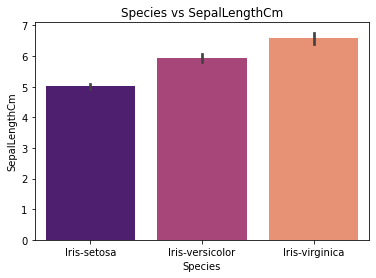

In [ ]:
plot_data('SepalLengthCm')

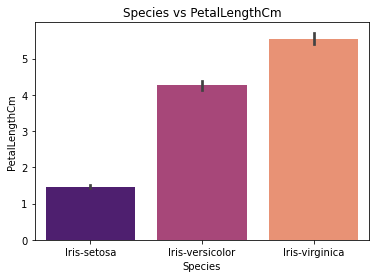

In [ ]:
plot_data('PetalLengthCm')

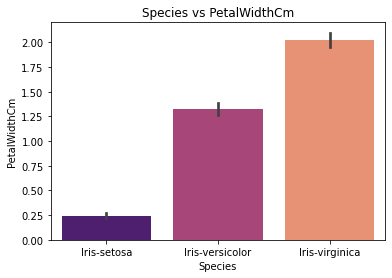

In [ ]:
plot_data('PetalWidthCm')

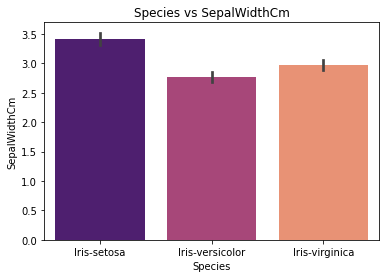

In [ ]:
plot_data('SepalWidthCm')

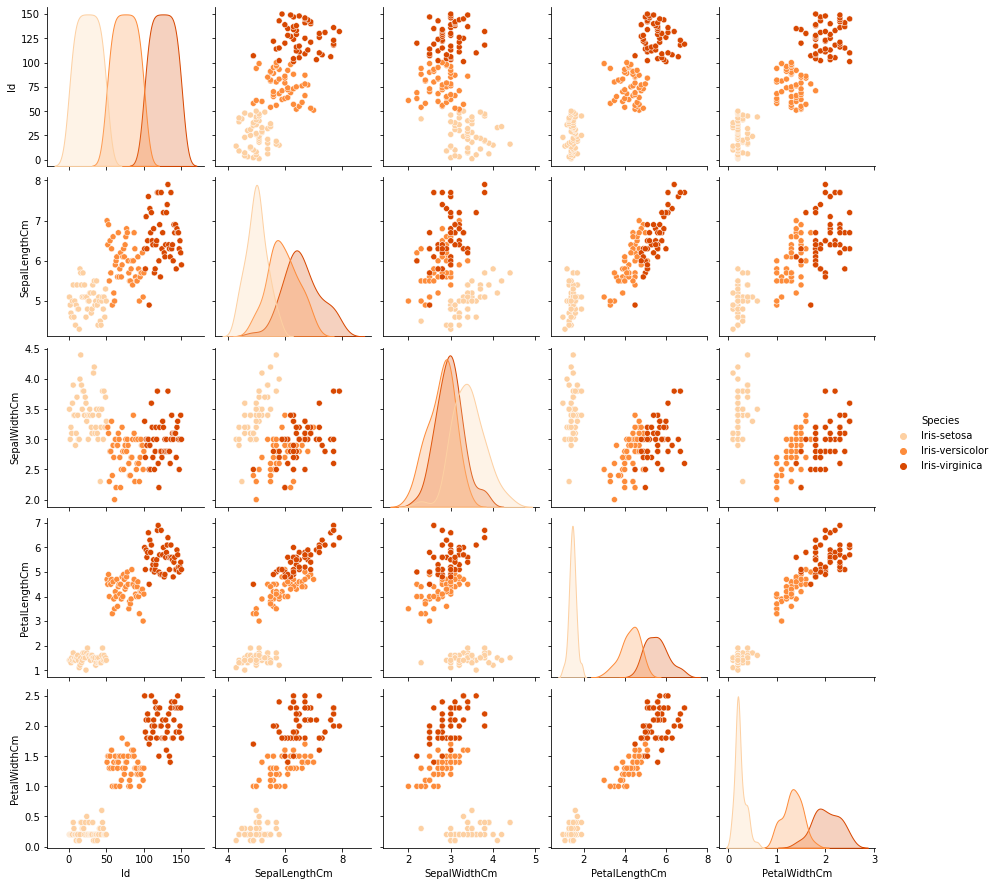

In [ ]:
sns.pairplot(df,hue='Species',palette="Oranges")

# **DECISION TREE CREATION**

In [ ]:
X = df.drop(['Species'], axis=1)
y = df['Species']


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [ ]:
X_train.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
46,5.1,3.8,1.6,0.2
142,5.8,2.7,5.1,1.9
135,7.7,3.0,6.1,2.3
104,6.5,3.0,5.8,2.2
96,5.7,2.9,4.2,1.3


In [ ]:
y_train.sample(5)

3          Iris-setosa
69     Iris-versicolor
106     Iris-virginica
87     Iris-versicolor
57     Iris-versicolor
Name: Species, dtype: object

In [ ]:
from sklearn import tree
from sklearn import metrics
model = tree.DecisionTreeClassifier().fit(X_train,y_train)

Training Score : 1.0
Predictions are :  ['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa']


Accuracy Score : 0.9777777777777777
Recall :0.9814814814814815
Precision :0.9722222222222222
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iri

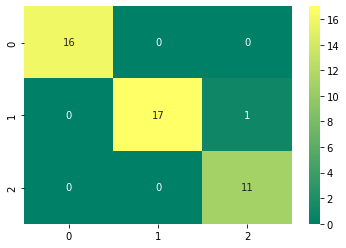

In [ ]:
print('Training Score : {}'.format(model.score(X_train,y_train)))
y_pred = model.predict(X_test)
print('Predictions are : ',y_pred)
print('\n')
accuracy_score = metrics.accuracy_score(y_test,y_pred)
print('Accuracy Score : {}'.format(accuracy_score))
print('Recall :{}'.format(metrics.recall_score(y_test,y_pred,average='macro')))
print('Precision :{}'.format(metrics.precision_score(y_test,y_pred,average='macro')))
print(metrics.classification_report(y_test,y_pred))
print(metrics.confusion_matrix(y_test,y_pred))
print(sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot = True,cmap = 'summer'))


# **PLOTTING DECISION TREE**

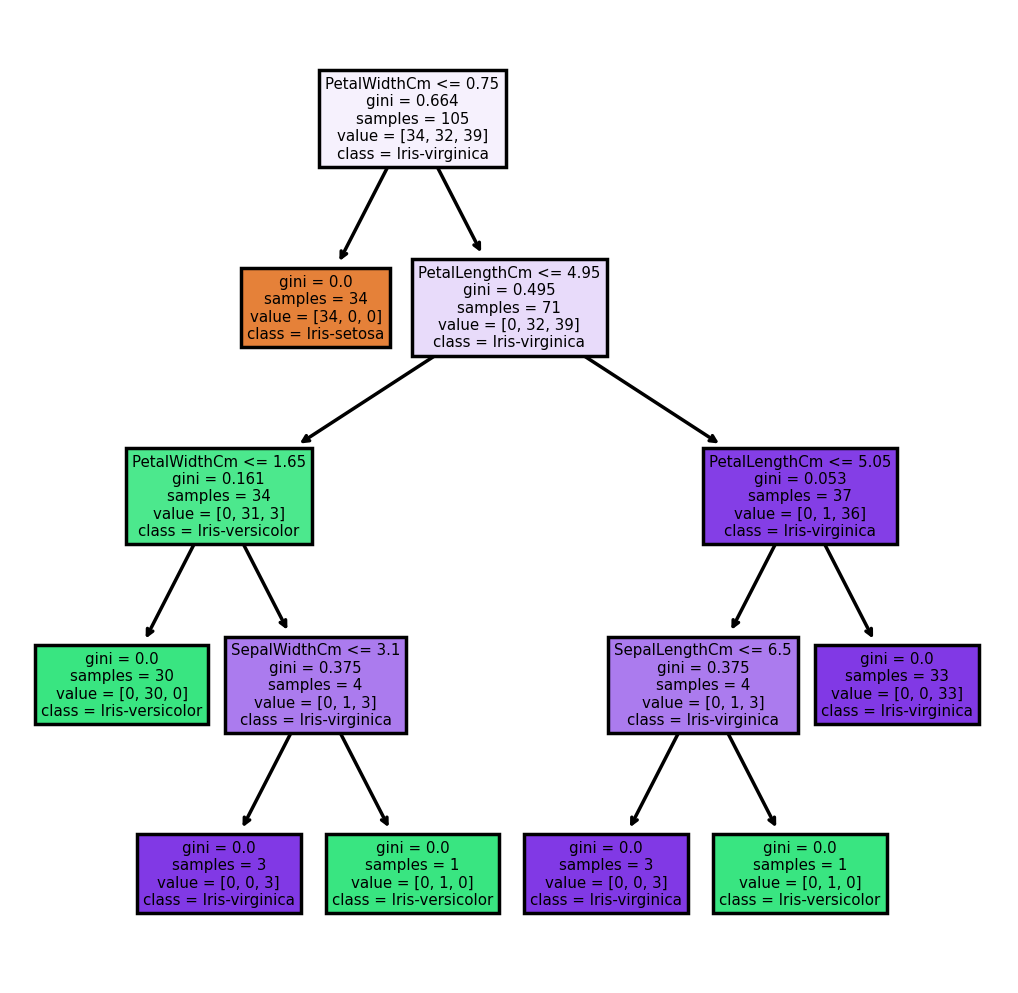

In [ ]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
classes = ['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5),dpi=250,facecolor='white')
tree.plot_tree(model,feature_names=features,class_names=classes,filled=True)
fig.savefig('IrisTree.png')

In [ ]:
df = pd.DataFrame({'y_true': y_test,
        'y_Predicted': y_pred})
df.reset_index(inplace = True, drop = True)
df.sample(10)

,y_true,y_Predicted
8,Iris-versicolor,Iris-versicolor
10,Iris-virginica,Iris-virginica
34,Iris-virginica,Iris-virginica
11,Iris-versicolor,Iris-versicolor
17,Iris-versicolor,Iris-versicolor
41,Iris-setosa,Iris-setosa
14,Iris-versicolor,Iris-versicolor
44,Iris-setosa,Iris-setosa
40,Iris-virginica,Iris-virginica
5,Iris-virginica,Iris-virginica


In [ ]:
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
parameters = {'max_leaf_nodes':[1,2,3,4,5,6,7,8,9,10]}
grid_model = GridSearchCV(model,param_grid=parameters,cv= 3,verbose = 2,n_jobs = -1).fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 316, in fit
    max_leaf_nodes
ValueError: max_leaf_nodes 1 must be either None or larger than 1

  warnings.warn(some_

# CONCLUSION
The Test Score is about 98%. I have also performed GridSearchCV to find the best parameters for the Decision Tree. 